In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

# Load the CSV files using your provided paths
train = pd.read_csv(r"C:\Users\HP\Downloads\train.csv")
songs = pd.read_csv(r"C:\Users\HP\Downloads\songs.csv")
members = pd.read_csv(r"C:\Users\HP\Downloads\members.csv")

# Display basic info
print("Train shape:", train.shape)
print("Songs shape:", songs.shape)
print("Members shape:", members.shape)

# View a few rows
train.head()


Train shape: (7377418, 6)
Songs shape: (2296320, 7)
Members shape: (34403, 7)


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
# Merge song metadata
data = train.merge(songs, on='song_id', how='left')

# Merge user metadata
data = data.merge(members, on='msno', how='left')

# Show merged result
print("Merged dataset shape:", data.shape)
data.head()


Merged dataset shape: (7377418, 18)


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005


In [13]:
# Fill missing values
data.fillna('unknown', inplace=True)

# Convert dates
data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
data['expiration_date'] = pd.to_datetime(data['expiration_date'], format='%Y%m%d')

# Drop unnecessary columns (optional)
data.drop(columns=['bd', 'gender'], inplace=True)


Top 10 Popular Songs:
 song_id
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    13973
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    13293
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    13079
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    12855
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    12004
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=    11835
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=    11745
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=    11521
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=    11131
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=    10791
Name: count, dtype: int64


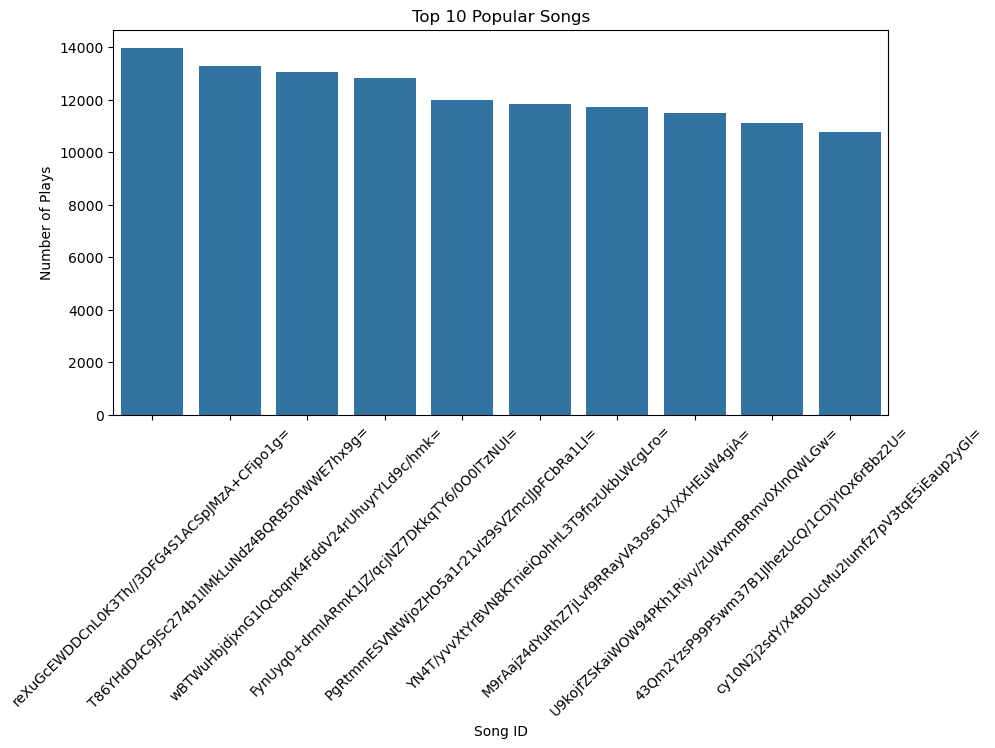

In [15]:
# Recommend top 10 most popular songs
top_songs = data['song_id'].value_counts().head(10)

print("Top 10 Popular Songs:\n", top_songs)

# Visualize
plt.figure(figsize=(10,5))
sns.barplot(x=top_songs.index, y=top_songs.values)
plt.xticks(rotation=45)
plt.title('Top 10 Popular Songs')
plt.xlabel('Song ID')
plt.ylabel('Number of Plays')
plt.show()


In [7]:
# Label encode users and songs
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

data['user'] = user_encoder.fit_transform(data['msno'])
data['song'] = song_encoder.fit_transform(data['song_id'])

# Create sparse matrix of users vs songs
user_song_matrix = csr_matrix((data['target'], (data['user'], data['song'])))

print("Shape of user-item matrix:", user_song_matrix.shape)
user_song_matrix_small = pd.DataFrame(
    np.random.randint(0, 2, (1000, 500))  # 1000 users, 500 songs
)

Shape of user-item matrix: (30755, 359966)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Ensure the matrix is in sparse format
user_song_matrix_sparse = csr_matrix(user_song_matrix_small)

# Compute similarity without converting to dense matrix
user_similarity = cosine_similarity(user_song_matrix_sparse, dense_output=False)
print("User similarity shape:", user_similarity.shape)


User similarity shape: (1000, 1000)


In [11]:
# Calculate user similarity
user_similarity = cosine_similarity(user_song_matrix)

print("User-User Similarity Matrix Shape:", user_similarity.shape)


User-User Similarity Matrix Shape: (30755, 30755)


In [13]:
# Choose a sample user
sample_user_index = 0

# Find top similar users
similar_users = list(np.argsort(user_similarity[sample_user_index])[-10:][::-1])

print("Top 10 similar users for User[0]:", similar_users)

# Recommend songs those users listened to
songs_listened_by_similar_users = data[data['user'].isin(similar_users)]['song_id']

# Top recommended songs (based on frequency)
recommended_songs = songs_listened_by_similar_users.value_counts().head(10)

print("Recommended Songs:\n", recommended_songs)


Top 10 similar users for User[0]: [0, 26983, 17006, 21342, 6116, 8987, 17784, 4638, 458, 24955]
Recommended Songs:
 song_id
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10
THqGcrzQyUhBn1NI/+Iptc1vKtxBIEg0uA8iaoJnO1Q=    10
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    10
A7Z2nDVASy04EpmfzOL9PRMN3hFVbWQ7ah4J+o9sLnE=    10
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=    10
8f/T4ohROj1wa25YHMItOW2/wJhRXZM0+T5/2p86COc=     9
OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=     9
+Sm75wnBf/sjm/QMUAFx8N+Ae04kWCXGlgH50tTeM6c=     9
r4lUPUkz3tAgIWaEyrSYVCxX1yz8PnlVuQz+To0Pd+c=     9
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=     9
Name: count, dtype: int64
